In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

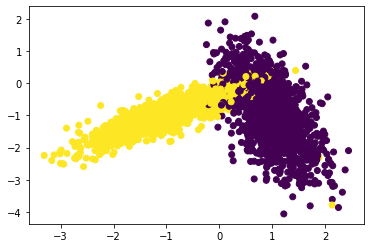

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [3]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    """
    This function takes the train dataset, testdataset, classifier, a tuple and 
    the number of folds     10 random numbers are chosen between the tuple range
    as the number of neighbours
    """
    # Getting 10 random numbers from uniform distribution in the specified range
    params_l = numpy.random.uniform(param_range[0], param_range[1], 10)
    
    # Creating two empty lists to store the train scores and the test scores
    trainscores = []
    testscores = []
    
    # Since the random numbers are going to be float values, converting them to integers and sorting them
    params_l = [int(i) for i in params_l]
    params_l.sort()
    
    for param in params_l: 
        # fold_size stores the size of each fold of the datset. fold_nums is a list containing numbers 
        # from 0 to the number of folds
        fold_size = len(X_train)/folds
        fold_nums = numpy.arange(folds)
        
        # trainscores_folds and testscores_folds store the train and test scores of each fold
        trainscores_folds = []
        testscores_folds  = []

        # Iterating over fold_nums
        for i in fold_nums.tolist():

            # X_temp and y_temp are copies of X_train and y_train. Creating copies as it'll be easier to delete 
            # the test fold from the datasets and use the remaining as train set
            X_temp = X_train
            y_temp = y_train
            
            # test_s and test_e will contain the starting and ending indices of test fold
            test_s = int(i*fold_size)
            test_e = int(((i+1)*fold_size)-1)
            
            # splicing the test fold. Deleting the test fold from temp dataset and using them as train folds
            x_test_fold = X_train[test_s:test_e]
            x_train_fold = numpy.delete(X_temp, [i for i in range(test_s, test_e)], axis = 0)
            y_test_fold = y_train[test_s:test_e]
            y_train_fold = numpy.delete(y_temp, [i for i in range(test_s, test_e)], axis = 0)
            
            # param is the number of neighbours. Fitting the classifier to the x and y train folds
            classifier.n_neighbors = param
            classifier.fit(x_train_fold,y_train_fold)
            
            # Predicting and calulating the test score for this fold
            y_predicted = classifier.predict(x_test_fold)
            testscores_folds.append(accuracy_score(y_test_fold, y_predicted))
            
            # Predicting and calculating the train score for this fold 
            y_predicted = classifier.predict(x_train_fold)
            trainscores_folds.append(accuracy_score(y_train_fold, y_predicted))
        
        # Appending the mean of the trainscore and testscores obtained from various fold combinations to the trainscores
        # and testscores arrays. These two arrays will be returned 
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    
    # Returning the trainscores, testscores and the parameters 
    return trainscores,testscores,params_l

In [4]:
# Importing libraries
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Creating a classifier
neigh = KNeighborsClassifier()

# Calling the function and storing the return values
trainscores,testscores, params = RandomSearchCV(X_train, y_train, neigh, (1,50), 3)

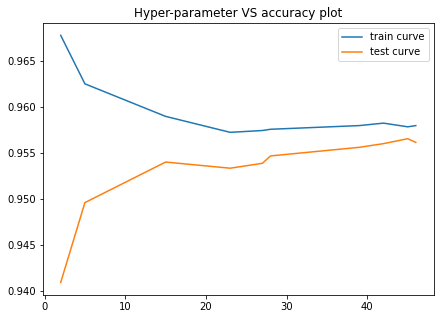

In [6]:
# Plotting the results obtained
f = plt.figure() 
f.set_figwidth(7) 
f.set_figheight(5)
plt.plot(params,trainscores, label='train curve')
plt.plot(params,testscores, label='test curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

#### Train curve and Test curve appear to be closest at 45. 

In [7]:
# Printing the params
params

[2, 5, 15, 23, 27, 28, 39, 42, 45, 46]

In [8]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

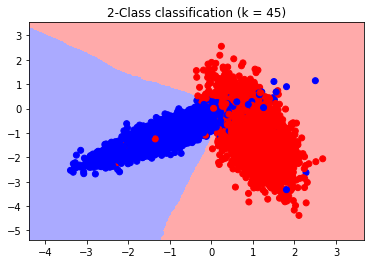

In [10]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 45)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)